# Installations

In [ ]:
!pip install category_encoders

You should consider upgrading via the 'C:\Users\Elamathi\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from numpy import mean
from numpy import std
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_squared_error
from category_encoders import BinaryEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
import seaborn as sns
import re
from sympy import *
import time

# Data preparation

In [ ]:
df1 = pd.read_csv('vehicles.csv', delimiter=',', nrows=100000)

In [ ]:
print(len(df1[df1['price'] < 100]))

9044


In [ ]:
df1.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df1['price'].describe()

count    1.000000e+05
mean     1.110640e+05
std      1.471778e+07
min      0.000000e+00
25%      5.999000e+03
50%      1.399500e+04
75%      2.599000e+04
max      3.024942e+09
Name: price, dtype: float64

In [ ]:
df1.region.unique()

array(['prescott', 'fayetteville', 'florida keys',
       'worcester / central MA', 'greensboro', 'hudson valley',
       'medford-ashland', 'erie', 'el paso', 'bellingham',
       'skagit / island / SJI', 'la crosse', 'auburn', 'birmingham',
       'dothan', 'florence / muscle shoals', 'gadsden-anniston',
       'huntsville / decatur', 'mobile', 'montgomery', 'tuscaloosa',
       'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'show low', 'sierra vista', 'tucson', 'yuma',
       'fort smith', 'jonesboro', 'little rock', 'texarkana',
       'bakersfield', 'chico', 'fresno / madera', 'gold country',
       'hanford-corcoran', 'humboldt county', 'imperial county',
       'inland empire', 'los angeles', 'mendocino county', 'merced',
       'modesto', 'monterey bay', 'orange county', 'palm springs',
       'redding', 'reno / tahoe', 'sacramento', 'san diego',
       'san luis obispo', 'santa barbara',

In [ ]:
df1.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df1.count()

id              100000
url             100000
region          100000
region_url      100000
price           100000
year             99572
manufacturer     95580
model            98715
condition        61711
cylinders        59841
fuel             99397
odometer         98479
title_status     97721
transmission     99486
VIN              63962
drive            69526
size             27846
type             80389
paint_color      70224
image_url        99962
description      99961
county               0
state           100000
lat              99461
long             99461
posting_date     99962
dtype: int64

In [ ]:
df1.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year               428
manufacturer      4420
model             1285
condition        38289
cylinders        40159
fuel               603
odometer          1521
title_status      2279
transmission       514
VIN              36038
drive            30474
size             72154
type             19611
paint_color      29776
image_url           38
description         39
county          100000
state                0
lat                539
long               539
posting_date        38
dtype: int64

In [ ]:
print(df1['year'].min())
print(df1['year'].max())

1900.0
2022.0


<AxesSubplot:>

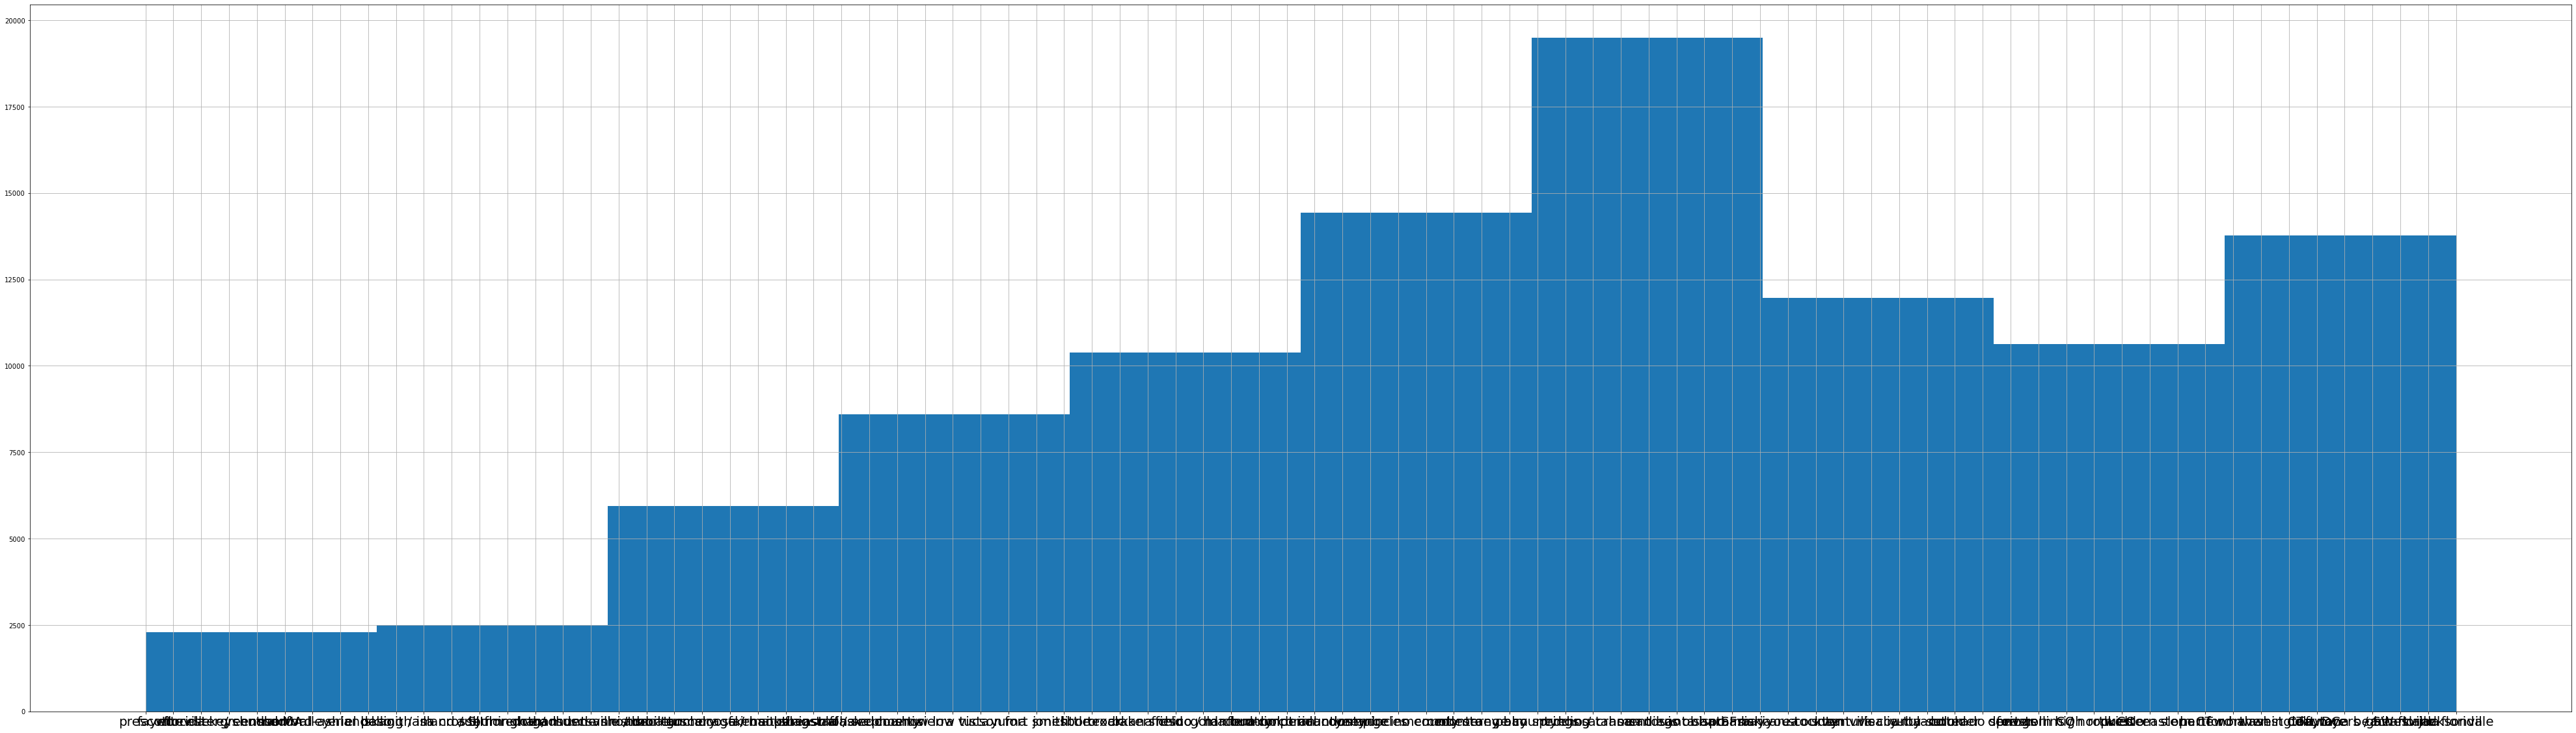

In [ ]:
df1.region.hist(xlabelsize=20, figsize=(70,20))

In [ ]:
region_hist_data = df1.groupby('region')['price'].count()

In [ ]:
# alphabetically
regions = sorted(df1.region.unique())

In [ ]:
# replace year with age
df1['age'] = 2022 - df1['year']

In [ ]:
df1['age']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
99995     3.0
99996     4.0
99997     3.0
99998     8.0
99999    33.0
Name: age, Length: 100000, dtype: float64

# year outliers

In [ ]:
df1.year.describe()
# only 428 null out of 100,000 rows, pretty good

count    99572.000000
mean      2010.944261
std         10.056314
min       1900.000000
25%       2008.000000
50%       2013.000000
75%       2017.000000
max       2022.000000
Name: year, dtype: float64

C:\Users\Elamathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


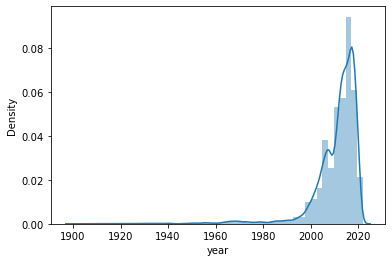

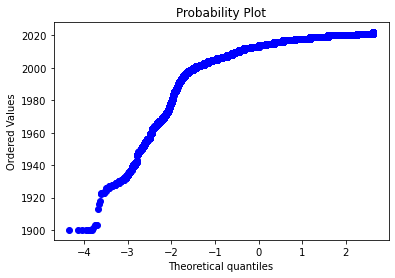

In [ ]:
sns.distplot(df1['year'])
fig = plt.figure()
res = stats.probplot(df1['year'], plot=plt)

In [ ]:
# change year to age
df1['age'] = 2022 - df1['year']

# Getting rid of price outliers

In [ ]:
# explore outliers
df1['price_z'] = stats.zscore(df1.price)

In [ ]:
# remove super high z scores
df2 = df1[(df1['price_z'] <= 4) & (df1['price_z'] >= -4 )]

{'whiskers': [<matplotlib.lines.Line2D at 0x230051d9040>,
 'caps': [<matplotlib.lines.Line2D at 0x230051d9700>,
 'boxes': [<matplotlib.lines.Line2D at 0x2300502eca0>],
 'medians': [<matplotlib.lines.Line2D at 0x230051d9dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230051e5160>],
 'means': []}

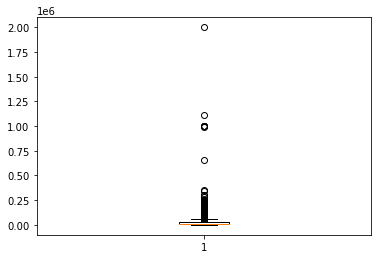

In [ ]:
plt.boxplot(df2["price"])
# there's some prices that are huge outliers. It might be better to remove them.

In [ ]:
df1[df1['price'] > 500000000]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,paint_color,image_url,description,county,state,lat,long,posting_date,age,price_z
280,7315849335,https://bham.craigslist.org/cto/d/trussville-1...,birmingham,https://bham.craigslist.org,987654321,1960.0,chevrolet,NaN,NaN,NaN,...,NaN,https://images.craigslist.org/00E0E_fZYzwRGkoI...,(TRADE VALUE IS HIGHER )I have a 1960 Impala h...,NaN,al,33.633900,-86.598100,2021-05-02T13:24:09-0500,62.0,67.098990
29386,7305265540,https://humboldt.craigslist.org/cto/d/mckinley...,humboldt county,https://humboldt.craigslist.org,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,...,white,https://images.craigslist.org/00n0n_4ekg8JL7Z1...,Thank you to everyone that contacted me concer...,NaN,ca,40.946500,-124.083400,2021-04-11T11:40:08-0700,23.0,75.487308
37409,7314053169,https://modesto.craigslist.org/ctd/d/modesto-w...,modesto,https://modesto.craigslist.org,1111111111,2020.0,jeep,NaN,NaN,NaN,...,NaN,https://images.craigslist.org/00808_hush0Q6qw7...,WE WILL BUY YOUR TRUCK & JEEP & HARLEY DAVIDS...,NaN,ca,37.640900,-120.974900,2021-04-28T14:29:17-0700,2.0,75.487308
37410,7314052904,https://modesto.craigslist.org/ctd/d/modesto-w...,modesto,https://modesto.craigslist.org,3009548743,2021.0,chevrolet,NaN,NaN,8 cylinders,...,NaN,https://images.craigslist.org/00707_lRqP2sVcBx...,WE WILL BUY YOUR TRUCK & JEEP & HARLEY DAVIDS...,NaN,ca,37.640900,-120.974900,2021-04-28T14:28:42-0700,1.0,204.477352
91576,7309730903,https://delaware.craigslist.org/ctd/d/newark-a...,delaware,https://delaware.craigslist.org,3024942282,2000.0,mercedes-benz,benz e320,NaN,NaN,...,NaN,https://images.craigslist.org/00e0e_2rjEdt2Ihz...,"Any year,any condition ! Text Jason 3024942282...",NaN,de,39.703511,-75.746681,2021-04-20T08:46:47-0400,22.0,205.523272


C:\Users\Elamathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


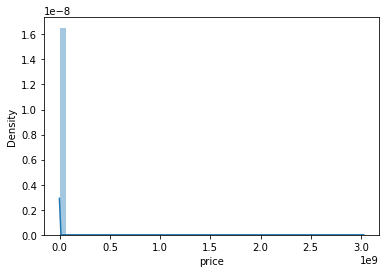

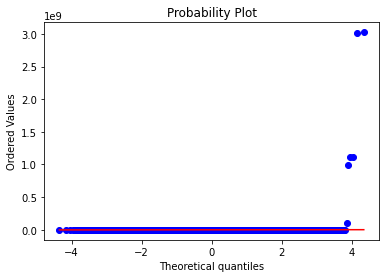

In [ ]:
sns.distplot(df1['price'])
fig = plt.figure()
res = stats.probplot(df1['price'], plot=plt)

In [ ]:
df1.price.describe()

count    1.000000e+05
mean     1.110640e+05
std      1.471778e+07
min      0.000000e+00
25%      5.999000e+03
50%      1.399500e+04
75%      2.599000e+04
max      3.024942e+09
Name: price, dtype: float64

In [ ]:
df_price = df1[['price','price_z']]
df_price

,price,price_z
0,6000,-0.007139
1,11900,-0.006738
2,21000,-0.006119
3,1500,-0.007444
4,4900,-0.007213
...,...,...
99995,49395,-0.004190
99996,18590,-0.006283
99997,49495,-0.004183
99998,24495,-0.005882


In [ ]:
df1.price.quantile(0.99)

68368.27999999933

In [ ]:
print(q1, q3, q_max)

7500.0 22995.0 51998.0


In [ ]:
df2 = df1[df1['price']< q_max]

In [ ]:
q1 = df1.price.quantile(0.30)
q3 = df1.price.quantile(0.70)
q_max = df1.price.quantile(0.97)
# remove all rows where the price is less than q1 or more than q3
# or choose only rows where price is between q1 and q3
df1_low = df1[df1['price']< q1]
df1_high = df1[(df1['price'] > q3) & (df1['price'] <= q_max)]
df1_mid = df1[(df1['price'] >= q1) & (df1['price'] <= q3)]

In [ ]:
len(df1[(df1['price'] > 0) & (df1['price'] <= q_max)])

88679

In [ ]:
# remove all cars where price is 0
df1 = df1[df1['price'] > 0]

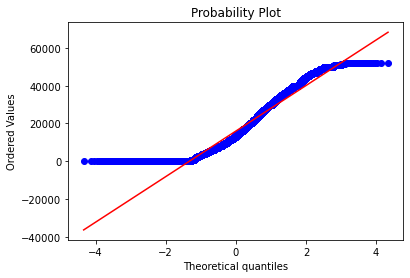

In [ ]:
res = stats.probplot(df2['price'], dist='norm', plot=plt)

{'whiskers': [<matplotlib.lines.Line2D at 0x230076a0f70>,
 'caps': [<matplotlib.lines.Line2D at 0x230076ae670>,
 'boxes': [<matplotlib.lines.Line2D at 0x230076a0c10>],
 'medians': [<matplotlib.lines.Line2D at 0x230076aed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x230076bb0d0>],
 'means': []}

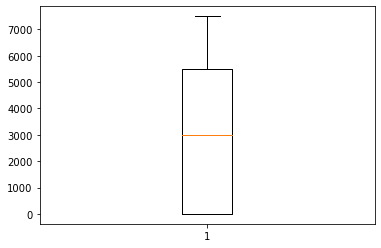

In [ ]:
# check new price plot
plt.boxplot(df1_low["price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x23007701eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2300770d550>,
 'boxes': [<matplotlib.lines.Line2D at 0x23007701b50>],
 'medians': [<matplotlib.lines.Line2D at 0x2300770dc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2300770df70>],
 'means': []}

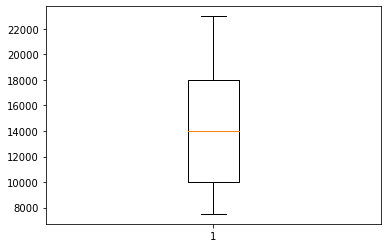

In [ ]:
plt.boxplot(df1_mid["price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x23007cf2f40>,
 'caps': [<matplotlib.lines.Line2D at 0x23007d00640>,
 'boxes': [<matplotlib.lines.Line2D at 0x23007cf2be0>],
 'medians': [<matplotlib.lines.Line2D at 0x23007d00ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23007d0d040>],
 'means': []}

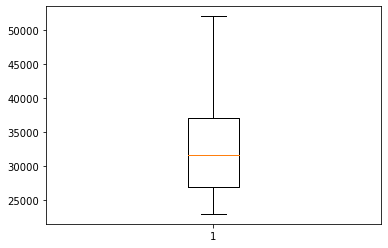

In [ ]:
plt.boxplot(df1_high["price"])

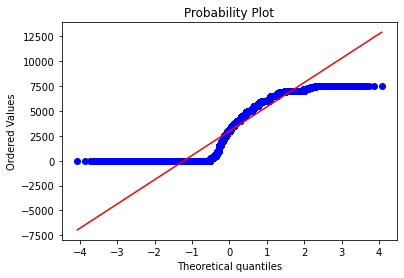

In [ ]:
res = stats.probplot(df1_low['price'], plot=plt)

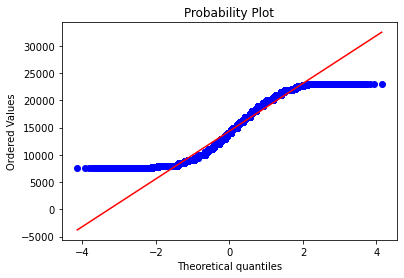

In [ ]:

res = stats.probplot(df1_mid['price'], dist='norm', plot=plt)

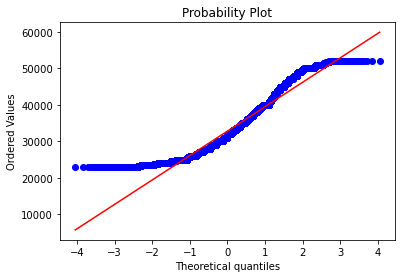

In [ ]:
res = stats.probplot(df1_high['price'], plot=plt)

In [ ]:
df1_high.price.describe()

count    26919.00000
mean     32794.88874
std       6901.33003
min      22997.00000
25%      26995.00000
50%      31590.00000
75%      36999.00000
max      51998.00000
Name: price, dtype: float64

C:\Users\Elamathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


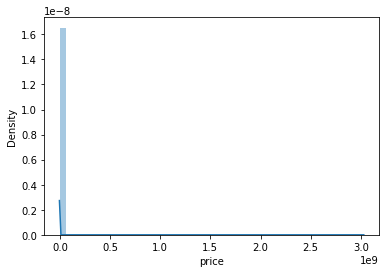

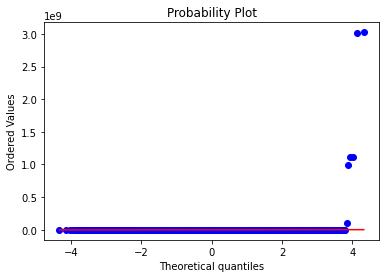

In [ ]:
sns.distplot(df1['price'])
fig = plt.figure()
res = stats.probplot(df1['price'], plot=plt)

In [ ]:
df1['price_norm'] = df1['price'] /df1['price'].abs().max()

In [ ]:
# graph above does not look linear before -1 and after 2 of theoretical quantiles
def inv_logit(p):
    return exp(p) / (1 + exp(p))

In [ ]:
df1['price_unlog'] = df1.apply(lambda row : inv_logit(row['price_norm']), axis = 1)

In [ ]:
df1['price_unlog']

0        0.500000495877230
1        0.500000983489840
2        0.500001735570305
3        0.500000123969307
4        0.500000404966405
               ...        
99995    0.500004082309297
99996    0.500001536392951
99997    0.500004090573917
99998    0.500002024418792
99999    0.500001074318019
Name: price_unlog, Length: 91672, dtype: object

C:\Users\Elamathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: 'float' object has no attribute 'shape'

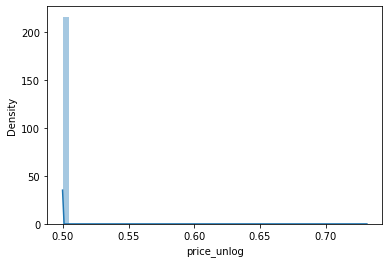

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.distplot(df1['price_unlog'])
fig = plt.figure()
res = stats.probplot(df1['price_unlog'], plot=plt)

In [ ]:
# graph above does not look linear before -1 and after 2 of theoretical quantiles
def inv_logit(p):
    return exp(p) / (1 + exp(p))

## Getting rid of useless columns

In [ ]:
df1 = df1.drop(labels=['id','url', 'region_url', 'image_url', 'description', 'county'], axis=1)

In [ ]:
df1.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date', 'age', 'price_z', 'price_norm', 'price_unlog'],
      dtype='object')

# Filling NA values (if possible)

In [ ]:
df1.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date', 'age', 'price_z', 'price_norm', 'price_unlog'],
      dtype='object')

In [ ]:
cols_for_none = ('manufacturer','model','condition','title_status','drive','size',
                'type','paint_color')
for c in cols_for_none:
  df1[c] = df1[c].fillna("None")

cols_for_zero = ('odometer','lat','long')
for c in cols_for_zero:
  df1[c] = df1[c].fillna(0.0)



In [ ]:
df1.isnull().sum()

region              0
price               0
year              421
manufacturer        0
model               0
condition           0
cylinders       35178
fuel              573
odometer            0
title_status        0
transmission      371
VIN             33901
drive               0
size                0
type                0
paint_color         0
state               0
lat                 0
long                0
posting_date       33
age               421
price_z             0
price_norm          0
price_unlog         0
dtype: int64

# Dropping NA values

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
posting_date    0
age             0
price_z         0
price_norm      0
price_unlog     0
dtype: int64

In [ ]:
# visually check which columns are categorical
df1.count()

region          33311
price           33311
year            33311
manufacturer    33311
model           33311
condition       33311
cylinders       33311
fuel            33311
odometer        33311
title_status    33311
transmission    33311
VIN             33311
drive           33311
size            33311
type            33311
paint_color     33311
state           33311
lat             33311
long            33311
posting_date    33311
age             33311
price_z         33311
price_norm      33311
price_unlog     33311
dtype: int64

In [ ]:
# looks like some of the prices are just 0. This is probably an error since you don't give away cars for free. For now, remove these rows
df1 = df1[df1.price != 0]

In [ ]:
df1

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,state,lat,long,posting_date,age,price_z,price_norm,price_unlog
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,...,pickup,white,al,32.590000,-85.480000,2021-05-04T12:31:18-0500,8.0,-0.005264,0.000011,0.500002776086026
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,...,pickup,blue,al,32.590000,-85.480000,2021-05-04T12:31:08-0500,12.0,-0.006011,0.000007,0.500001866977771
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,...,pickup,red,al,32.590000,-85.480000,2021-05-04T12:31:25-0500,2.0,-0.004856,0.000013,0.500003271963257
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,pickup,red,al,32.590000,-85.480000,2021-05-04T10:41:31-0500,5.0,-0.005441,0.000010,0.500002561205893
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,...,pickup,black,al,32.590000,-85.480000,2021-05-03T13:41:25-0500,10.0,-0.005644,0.000009,0.500002313267278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,jacksonville,41595,2015.0,ford,f-150 platinum 4x4,excellent,6 cylinders,gas,56451.0,clean,...,truck,black,fl,30.207288,-81.738969,2021-04-19T13:56:50-0400,7.0,-0.004720,0.000014,0.500003437668898
99994,jacksonville,30795,2016.0,chevrolet,silverado 2500hd 4x4,excellent,8 cylinders,gas,70447.0,clean,...,truck,silver,fl,30.207288,-81.738969,2021-04-19T13:55:10-0400,6.0,-0.005454,0.000010,0.500002545089883
99995,jacksonville,49395,2019.0,chevrolet,silverado trail boss,new,8 cylinders,gas,12700.0,clean,...,pickup,red,fl,30.207288,-81.738969,2021-04-19T13:50:58-0400,3.0,-0.004190,0.000016,0.500004082309297
99997,jacksonville,49495,2019.0,chevrolet,silverado trail boss,new,8 cylinders,gas,12700.0,clean,...,pickup,red,fl,30.207288,-81.738969,2021-04-19T13:46:36-0400,3.0,-0.004183,0.000016,0.500004090573917


In [ ]:
df1.nunique()

region             75
price            3503
year               82
manufacturer       42
model            5440
condition           7
cylinders           8
fuel                5
odometer        15519
title_status        7
transmission        3
VIN             18189
drive               4
size                5
type               14
paint_color        13
state              10
lat              3269
long             3262
posting_date    31836
age                82
price_z          3503
price_norm       3503
price_unlog      3503
dtype: int64

## Small Test

use simple features to check MSE

# Easy data preparation pipeline

In [ ]:
df1.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date', 'age', 'price_z', 'price_norm', 'price_unlog'],
      dtype='object')

## Encoding the categorical values

In [ ]:
df_s = df1[['state']]
new_data = pd.get_dummies(df_s['state'], prefix = 'state')
new_data

,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl
27,0,1,0,0,0,0,0,0,0,0
28,0,1,0,0,0,0,0,0,0,0
29,0,1,0,0,0,0,0,0,0,0
30,0,1,0,0,0,0,0,0,0,0
32,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
99993,0,0,0,0,0,0,0,0,0,1
99994,0,0,0,0,0,0,0,0,0,1
99995,0,0,0,0,0,0,0,0,0,1
99997,0,0,0,0,0,0,0,0,0,1


In [ ]:
# this function takes in a df, and a list of categories that you want to encode
# encodes each of them using binary encoding
# puts them onto the original data set
# creates a mapping from the original column to it's encoded columns
# and returns the new data set and the mappings
def encode_categories(df, column_list):
  maps = {}
  for col in column_list:
    # if there are <= 6 unique values, just use one hot encoding (Todo)
    if len(df[col].unique()) > 7:
      encoder = BinaryEncoder(cols=[col])
      new_data = encoder.fit_transform(df[col])
    else:
      new_data = pd.get_dummies(df[col], prefix = col)
    #new_data = encoder.fit_transform(df[col])
    df = pd.concat([df, new_data], axis = 1)
    map = df[[col] + list(new_data.columns)].drop_duplicates()
    df = df.drop([col], axis = 1)
    maps[col] = map
  return df, maps


In [ ]:
df1 = pd.read_csv('vehicles.csv', delimiter=',', nrows=100000)
df1 = df1.drop(labels=['id','url', 'region_url', 'image_url', 'description', 'county'], axis=1)
df1 = df1[df1['price'] >= 1000] # change this for lowest price min
cols_for_none = ('manufacturer','model','condition','title_status','drive','size',
                'type','paint_color')
cols_for_zero = ('odometer','lat','long')

for c in cols_for_none:
  df1[c] = df1[c].fillna("None")
for c in cols_for_zero:
  df1[c] = df1[c].fillna(0.0)

df1 = df1.dropna()

df1_categories = list(df1.select_dtypes('object'))
df1, maps = encode_categories(df1, df1_categories) # make sure the code block for this function has run

q1 = df1.price.quantile(0.30)
q3 = df1.price.quantile(0.70)
q_max = df1.price.quantile(0.97)
# remove all rows where the price is less than q1 or more than q3
# or choose only rows where price is between q1 and q3
df1_low = df1[df1['price']< q1]
df1_high = df1[(df1['price'] > q3) & (df1['price'] <= q_max)]
df1_mid = df1[(df1['price'] >= q1) & (df1['price'] <= q3)]

new_dfs = [df1_low, df1_mid, df1_high]

# get list of all the categorical columns

train_sets = []
test_sets = []

for df in new_dfs:
  train, test = train_test_split(df, test_size = 0.2, random_state = 10)
  train_sets.append(train)
  test_sets.append(test)

train_sets_X = []
test_sets_X = []
train_sets_y = []
test_sets_y = []

for s in train_sets:
  train_X = s.loc[:, s.columns != 'price']
  train_y = s['price']
  train_sets_X.append(train_X)
  train_sets_y.append(train_y)

for s in test_sets:
  test_X = s.loc[:, s.columns != 'price']
  test_y = s['price']
  test_sets_X.append(test_X)
  test_sets_y.append(test_y)


# Pipelines Using Random Forest Regressor

## Model preparation pipeline

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
y_hats = []
num_of_sets = len(test_sets_X)
for i in range(num_of_sets):
  print(i)
  model = RandomForestRegressor()
  model.fit(train_sets_X[i], train_sets_y[i])
  y_hat = model.predict(test_sets_X[i])
  y_hats.append(y_hat)

0
1
2


In [ ]:
# MSE check
for i in range(num_of_sets):
  print(mean_squared_error(test_sets_y[i], y_hats[i]))

2145406.61148021
5590488.1889678715
10922037.261232575


In [ ]:
# MAPE check
for i in range(num_of_sets):
  print(mean_absolute_percentage_error(test_sets_y[i], y_hats[i]))

0.1931918158617272
0.08896250180248715
0.05359873015014483


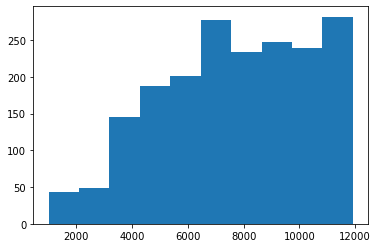

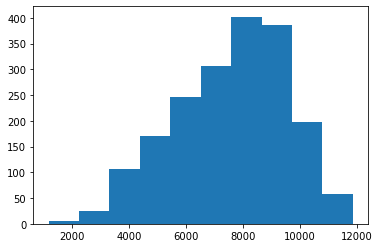

In [ ]:
# low set seems to have great MAPE (likely due to low price means a lower difference in price still results in large percent error)
plt.hist(test_sets_y[0])
plt.show()
plt.hist(y_hats[0])
plt.show()

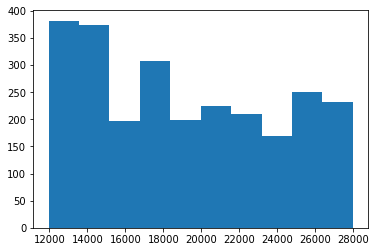

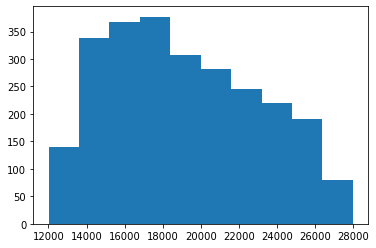

In [ ]:
plt.hist(test_sets_y[1])
plt.show()
plt.hist(y_hats[1])
plt.show()

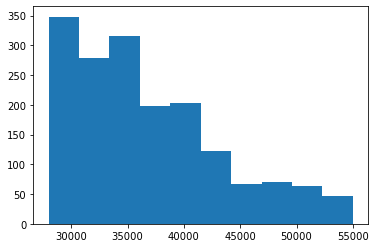

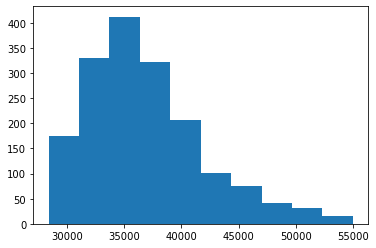

In [ ]:
plt.hist(test_sets_y[2])
plt.show()
plt.hist(y_hats[2])
plt.show()

## Random Forest Voting model

In [ ]:
# need to label according to which set of data the car was partitioned 
df1['price_cat'] = df1['price']
df1.loc[df1['price']< q1, 'price_cat'] = 0
df1.loc[(df1['price'] >= q1) & (df1['price'] <= q3), 'price_cat'] = 1
df1.loc[df1['price'] > q3,'price_cat'] = 2
df1_cat = df1.loc[:, df1.columns != 'price']

In [ ]:
df1_cat

,year,odometer,lat,long,region_0,region_1,region_2,region_3,region_4,region_5,...,posting_date_6,posting_date_7,posting_date_8,posting_date_9,posting_date_10,posting_date_11,posting_date_12,posting_date_13,posting_date_14,price_cat
27,2014.0,57923.0,32.590000,-85.480000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
28,2010.0,71229.0,32.590000,-85.480000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
29,2020.0,19160.0,32.590000,-85.480000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
30,2017.0,41124.0,32.590000,-85.480000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
32,2012.0,68696.0,32.590000,-85.480000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,2015.0,56451.0,30.207288,-81.738969,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,2
99994,2016.0,70447.0,30.207288,-81.738969,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,2
99995,2019.0,12700.0,30.207288,-81.738969,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,2
99997,2019.0,12700.0,30.207288,-81.738969,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,1,2


In [ ]:
train_v, test_v = train_test_split(df1, test_size = 0.2, random_state = 10)
train_v_X = train_v.loc[:, train_v.columns != 'price_cat']
train_v_y = train_v['price_cat']
test_v_X = test_v.loc[:, train_v.columns != 'price_cat']
test_v_y = test_v['price_cat']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(train_v_X, train_v_y)
v_y_hat = model.predict(test_v_X)

In [ ]:
test_v_y

70271    0
76252    1
57767    2
70746    2
33326    0
        ..
90511    0
34931    0
98620    2
50800    1
38100    0
Name: price_cat, Length: 6353, dtype: int64

In [ ]:
print(v_y_hat[6253], test_v_y.iloc[6253])

2 2


In [ ]:
for i in range(len(v_y_hat)):
  print(i, v_y_hat[i])

0 0
1 1
2 2
3 2
4 0
5 1
6 2
7 1
8 1
9 1
10 1
11 2
12 0
13 2
14 0
15 1
16 1
17 0
18 2
19 0
20 0
21 0
22 1
23 1
24 0
25 0
26 1
27 1
28 1
29 1
30 2
31 0
32 0
33 2
34 2
35 1
36 2
37 0
38 1
39 2
40 1
41 2
42 2
43 2
44 0
45 1
46 0
47 2
48 1
49 0
50 2
51 2
52 0
53 1
54 2
55 2
56 2
57 1
58 0
59 2
60 0
61 2
62 2
63 2
64 1
65 2
66 1
67 2
68 1
69 2
70 0
71 1
72 2
73 0
74 0
75 1
76 0
77 1
78 2
79 1
80 0
81 1
82 2
83 0
84 2
85 2
86 0
87 1
88 1
89 1
90 1
91 2
92 1
93 2
94 1
95 1
96 2
97 1
98 2
99 1
100 2
101 2
102 1
103 2
104 1
105 1
106 2
107 0
108 1
109 0
110 0
111 0
112 0
113 0
114 1
115 0
116 1
117 1
118 1
119 2
120 2
121 1
122 1
123 2
124 1
125 2
126 0
127 0
128 0
129 1
130 0
131 0
132 0
133 1
134 0
135 2
136 2
137 2
138 1
139 2
140 0
141 1
142 0
143 2
144 1
145 1
146 0
147 1
148 0
149 1
150 1
151 0
152 1
153 1
154 0
155 0
156 1
157 2
158 0
159 1
160 1
161 0
162 0
163 2
164 2
165 1
166 1
167 2
168 2
169 1
170 0
171 1
172 2
173 1
174 2
175 1
176 2
177 1
178 2
179 1
180 1
181 0
182 2
183 1
184 1


1426 1
1427 2
1428 2
1429 0
1430 1
1431 1
1432 0
1433 1
1434 2
1435 1
1436 2
1437 1
1438 1
1439 1
1440 0
1441 1
1442 0
1443 1
1444 0
1445 0
1446 2
1447 1
1448 2
1449 1
1450 0
1451 1
1452 1
1453 2
1454 2
1455 1
1456 2
1457 1
1458 2
1459 0
1460 1
1461 2
1462 1
1463 1
1464 1
1465 1
1466 1
1467 1
1468 1
1469 1
1470 2
1471 0
1472 0
1473 1
1474 2
1475 1
1476 2
1477 1
1478 0
1479 1
1480 1
1481 1
1482 0
1483 2
1484 1
1485 1
1486 1
1487 1
1488 1
1489 1
1490 0
1491 2
1492 2
1493 1
1494 0
1495 0
1496 2
1497 0
1498 0
1499 0
1500 0
1501 0
1502 1
1503 1
1504 0
1505 1
1506 1
1507 1
1508 2
1509 1
1510 1
1511 0
1512 1
1513 1
1514 2
1515 2
1516 1
1517 0
1518 1
1519 2
1520 1
1521 1
1522 0
1523 2
1524 1
1525 1
1526 0
1527 1
1528 2
1529 2
1530 0
1531 2
1532 1
1533 1
1534 1
1535 1
1536 0
1537 0
1538 0
1539 0
1540 2
1541 0
1542 0
1543 2
1544 0
1545 0
1546 1
1547 2
1548 1
1549 0
1550 1
1551 2
1552 1
1553 2
1554 1
1555 2
1556 2
1557 1
1558 2
1559 2
1560 2
1561 0
1562 0
1563 2
1564 0
1565 2
1566 2
1567 0
1568 1

2772 1
2773 1
2774 1
2775 1
2776 2
2777 0
2778 2
2779 2
2780 1
2781 1
2782 0
2783 1
2784 0
2785 2
2786 0
2787 2
2788 0
2789 1
2790 0
2791 0
2792 1
2793 2
2794 1
2795 2
2796 1
2797 0
2798 2
2799 2
2800 2
2801 0
2802 1
2803 2
2804 0
2805 1
2806 1
2807 0
2808 1
2809 1
2810 2
2811 0
2812 0
2813 0
2814 2
2815 2
2816 0
2817 0
2818 2
2819 2
2820 2
2821 2
2822 2
2823 0
2824 2
2825 1
2826 2
2827 1
2828 0
2829 2
2830 0
2831 1
2832 2
2833 2
2834 0
2835 0
2836 0
2837 2
2838 2
2839 1
2840 1
2841 2
2842 0
2843 2
2844 0
2845 0
2846 2
2847 0
2848 1
2849 1
2850 2
2851 1
2852 1
2853 1
2854 2
2855 0
2856 0
2857 2
2858 1
2859 0
2860 2
2861 0
2862 2
2863 2
2864 1
2865 0
2866 1
2867 2
2868 0
2869 0
2870 1
2871 2
2872 2
2873 1
2874 2
2875 0
2876 1
2877 1
2878 0
2879 2
2880 1
2881 2
2882 1
2883 1
2884 2
2885 1
2886 2
2887 0
2888 0
2889 0
2890 0
2891 2
2892 2
2893 1
2894 2
2895 0
2896 1
2897 1
2898 0
2899 1
2900 1
2901 0
2902 2
2903 2
2904 1
2905 1
2906 0
2907 1
2908 1
2909 2
2910 1
2911 1
2912 0
2913 0
2914 2

4210 1
4211 2
4212 1
4213 0
4214 2
4215 0
4216 0
4217 1
4218 0
4219 2
4220 1
4221 1
4222 2
4223 1
4224 0
4225 2
4226 1
4227 0
4228 0
4229 0
4230 0
4231 2
4232 2
4233 1
4234 1
4235 1
4236 2
4237 0
4238 2
4239 2
4240 1
4241 0
4242 2
4243 1
4244 0
4245 1
4246 0
4247 2
4248 1
4249 0
4250 1
4251 1
4252 0
4253 2
4254 0
4255 0
4256 1
4257 0
4258 2
4259 1
4260 1
4261 1
4262 1
4263 0
4264 0
4265 1
4266 0
4267 2
4268 1
4269 0
4270 1
4271 1
4272 1
4273 1
4274 0
4275 0
4276 1
4277 0
4278 0
4279 1
4280 0
4281 0
4282 1
4283 1
4284 0
4285 1
4286 0
4287 2
4288 0
4289 0
4290 2
4291 2
4292 1
4293 0
4294 2
4295 1
4296 0
4297 2
4298 2
4299 0
4300 0
4301 2
4302 0
4303 2
4304 1
4305 1
4306 1
4307 2
4308 1
4309 2
4310 1
4311 1
4312 1
4313 1
4314 0
4315 1
4316 1
4317 1
4318 2
4319 0
4320 1
4321 1
4322 1
4323 2
4324 0
4325 0
4326 1
4327 2
4328 1
4329 1
4330 2
4331 1
4332 2
4333 1
4334 1
4335 2
4336 1
4337 2
4338 2
4339 0
4340 1
4341 2
4342 2
4343 1
4344 0
4345 1
4346 1
4347 1
4348 2
4349 0
4350 0
4351 1
4352 2

5636 2
5637 2
5638 0
5639 0
5640 2
5641 0
5642 1
5643 0
5644 1
5645 1
5646 0
5647 0
5648 0
5649 1
5650 1
5651 1
5652 1
5653 1
5654 2
5655 1
5656 2
5657 2
5658 2
5659 0
5660 2
5661 0
5662 1
5663 1
5664 2
5665 2
5666 2
5667 0
5668 1
5669 1
5670 0
5671 1
5672 1
5673 2
5674 2
5675 1
5676 2
5677 1
5678 1
5679 0
5680 1
5681 1
5682 2
5683 1
5684 1
5685 0
5686 1
5687 0
5688 1
5689 0
5690 2
5691 2
5692 1
5693 2
5694 0
5695 2
5696 2
5697 0
5698 2
5699 1
5700 1
5701 1
5702 1
5703 1
5704 1
5705 2
5706 2
5707 2
5708 0
5709 1
5710 1
5711 1
5712 2
5713 1
5714 2
5715 1
5716 2
5717 1
5718 2
5719 2
5720 2
5721 0
5722 0
5723 0
5724 2
5725 1
5726 1
5727 0
5728 2
5729 2
5730 1
5731 0
5732 0
5733 0
5734 1
5735 1
5736 2
5737 2
5738 2
5739 2
5740 2
5741 0
5742 0
5743 1
5744 0
5745 0
5746 0
5747 1
5748 0
5749 1
5750 0
5751 1
5752 2
5753 2
5754 0
5755 0
5756 2
5757 1
5758 1
5759 0
5760 1
5761 1
5762 1
5763 2
5764 0
5765 2
5766 1
5767 2
5768 2
5769 1
5770 1
5771 1
5772 0
5773 0
5774 1
5775 2
5776 0
5777 2
5778 2

In [ ]:
# compare classification accuracy
tally = 0
for i in range(len(test_v_y)):
  if test_v_y.iloc[i] == v_y_hat[i]:
    tally = tally + 1
acc = tally/len(test_v_y)
print(acc)

0.9992129702502754


In [ ]:
# compare classification accuracy within 1 class range
tally = 0
for i in range(len(test_v_y)):
  if abs(test_v_y.iloc[i] - v_y_hat[i]) > 1 :
    tally = tally + 1
acc = tally/len(test_v_y)
print(acc)
print(tally)

0.0
0


# Combining the models

In [ ]:
# data prep
def data_prep(num_of_rows, rand_state = 10, price_min = 100):
  df1 = pd.read_csv('vehicles.csv', delimiter=',', nrows=num_of_rows)
  df1 = df1.drop(labels=['id','url', 'region_url', 'image_url', 'description', 'county'], axis=1)
  df1 = df1[df1['price'] >= price_min]
  cols_for_none = ('manufacturer','model','condition','title_status','drive','size',
                  'type','paint_color')
  cols_for_zero = ('odometer','lat','long')

  for c in cols_for_none:
    df1[c] = df1[c].fillna("None")
  for c in cols_for_zero:
    df1[c] = df1[c].fillna(0.0)

  df1 = df1.dropna()
  print("df length:")
  print(len(df1.index))
  df1_categories = list(df1.select_dtypes('object'))
  df1, maps = encode_categories(df1, df1_categories) # make sure the code block for this function has run

  # first partition into train and test
  train, test = train_test_split(df1, test_size = 0.2, random_state = rand_state)
  print("train_df length:")
  print(len(train.index))
  print("test_df length:")
  print(len(test.index))
  q1 = train.price.quantile(0.30)
  q3 = train.price.quantile(0.70)
  q_max = train.price.quantile(0.97)
  # remove all rows where the price is less than q1 or more than q3
  # or choose only rows where price is between q1 and q3
  train_low = train[train['price']< q1]
  train_high = train[(train['price'] > q3) & (train['price'] <= q_max)]
  train_mid = train[(train['price'] >= q1) & (train['price'] <= q3)]

  # get dfs to train 3 separate models
  train_dfs = [train_low, train_mid, train_high]

  # get categorical df for voting model 
  train['price_cat'] = train['price']
  train.loc[train['price']< q1, 'price_cat'] = 0
  train.loc[(train['price'] >= q1) & (train['price'] <= q3), 'price_cat'] = 1
  train.loc[train['price'] > q3, 'price_cat'] = 2
  train_cat = train.loc[:, train.columns != 'price']
  return (train_dfs, train_cat, maps, test)

In [ ]:
# train data setup
def model_training_setup(train_dfs,train_cat):
  train_sets_X = []
  train_sets_y = []

  for s in train_dfs:
    train_X = s.loc[:, s.columns != 'price']
    train_y = s['price']
    train_sets_X.append(train_X)
    train_sets_y.append(train_y)

  train_v_X = train_cat.loc[:, train_cat.columns != 'price_cat']
  train_v_y = train_cat['price_cat']

  return (train_sets_X, train_sets_y, train_v_X, train_v_y)

In [ ]:
# test data setup
def model_testing_setup(test):
  test_X = test.loc[:, test.columns != 'price']
  test_y = test['price']
  return(test_X, test_y)

In [ ]:
# model training
def train_models(train_sets_X, train_sets_y, train_v_X, train_v_y):
  etc_model = RandomForestClassifier()
  tic = time.perf_counter()
  etc_model.fit(train_v_X, train_v_y)
  toc = time.perf_counter()
  training_v_time = toc - tic
  num_of_sets = len(train_sets_X)
  etr_models = []
  training_sets_time = 0
  for i in range(num_of_sets):
    model = RandomForestRegressor()
    tic = time.perf_counter()
    model.fit(train_sets_X[i], train_sets_y[i])
    toc = time.perf_counter()
    run_time = toc - tic
    training_sets_time = training_sets_time + run_time
    etr_models.append(model)

  return (etc_model, etr_models, training_v_time, training_sets_time) 

In [ ]:
def test_models(etc_model, etr_models, test_X, test_y):
  y_hats = []
  # use voter to predict which model to use
  tic = time.perf_counter()
  voted_model_num = etc_model.predict(test_X)
  toc = time.perf_counter()
  classifier_time = toc - tic
  regressor_time = 0
  for i in range(len(voted_model_num)):
    model_num = voted_model_num[i]
    #if model_num > 2:
    #  model_num = 2
    m = etr_models[model_num]
    tic = time.perf_counter()
    y_hat = m.predict(test_X.iloc[i:i+1])
    toc = time.perf_counter()
    regressor_time = regressor_time + toc - tic
    # y_hat is an array of 1, but we just want to extract the value
    y_hat = y_hat[0]
    y_hats.append(y_hat)

  return mean_absolute_percentage_error(y_hats, test_y), y_hats, classifier_time, regressor_time

In [ ]:
train_dfs, train_cat, maps, test = data_prep(100000, 10)

df length:
32946
train_df length:
26356
test_df length:
6590


<ipython-input-79-ff13100726f2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price_cat'] = train['price']
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
train_sets_X, train_sets_y, train_v_X, train_v_y = model_training_setup(train_dfs,train_cat)

In [ ]:
test_X, test_y = model_testing_setup(test)

In [ ]:
etc_model, etr_models, training_v_time, training_sets_time = train_models(train_sets_X, train_sets_y, train_v_X, train_v_y)

In [ ]:
mape, y_hats, classifier_time, regressor_time = test_models(etc_model, etr_models, test_X, test_y)
print(training_v_time, training_sets_time, classifier_time, regressor_time)

12.17706649999991 95.89948460000005 0.5050451999999268 175.0798646000119


In [ ]:
mape

0.16467314689260162

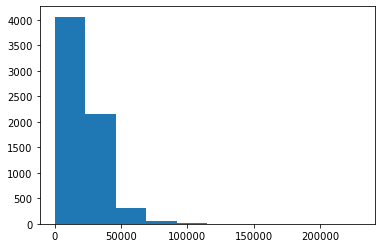

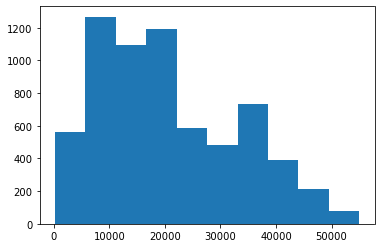

In [ ]:
plt.hist(test_y)
plt.show()
plt.hist(y_hats)
plt.show()

In [ ]:
test_X.iloc[10:11]

,year,odometer,lat,long,region_0,region_1,region_2,region_3,region_4,region_5,...,posting_date_5,posting_date_6,posting_date_7,posting_date_8,posting_date_9,posting_date_10,posting_date_11,posting_date_12,posting_date_13,posting_date_14
99006,2017.0,114134.0,30.224282,-81.737588,1,0,0,1,0,1,...,0,1,1,0,1,0,1,0,0,1


In [ ]:
test_X.iloc[0]

year                2001.0000
odometer           90708.0000
lat                   61.3867
long                -149.4809
region_0               0.0000
                      ...    
posting_date_10        1.0000
posting_date_11        0.0000
posting_date_12        0.0000
posting_date_13        1.0000
posting_date_14        0.0000
Name: 5878, Length: 107, dtype: float64

# Multi test

In [ ]:
def multi_test(num_of_rows = 100000, num_of_tests = 5):
  mapes = []
  training_v_times = []
  training_sets_times = []
  classifier_times = [] 
  regressor_times = []
  for i in range(num_of_tests):
    train_dfs, train_cat, maps, test = data_prep(num_of_rows, i)
    train_sets_X, train_sets_y, train_v_X, train_v_y = model_training_setup(train_dfs,train_cat)
    test_X, test_y = model_testing_setup(test)
    etc_model, etr_models, training_v_time, training_sets_time = train_models(train_sets_X, train_sets_y, train_v_X, train_v_y)
    mape, y_hats, classifier_time, regressor_time = test_models(etc_model, etr_models, test_X, test_y)
    mapes.append(mape)
    training_v_times.append(training_v_time)
    training_sets_times.append(training_sets_time)
    classifier_times.append(classifier_time)
    regressor_times.append(regressor_time)

  return mapes, training_v_times, training_sets_times, classifier_times, regressor_times

In [ ]:
mapes, training_v_times, training_sets_times, classifier_times, regressor_times = multi_test()

df length:
32946
train_df length:
26356
test_df length:
6590


<ipython-input-79-ff13100726f2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price_cat'] = train['price']
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

df length:
32946
train_df length:
26356
test_df length:
6590


<ipython-input-79-ff13100726f2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price_cat'] = train['price']
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

df length:
32946
train_df length:
26356
test_df length:
6590


<ipython-input-79-ff13100726f2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price_cat'] = train['price']
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

df length:
32946
train_df length:
26356
test_df length:
6590


<ipython-input-79-ff13100726f2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price_cat'] = train['price']
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

df length:
32946
train_df length:
26356
test_df length:
6590


<ipython-input-79-ff13100726f2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price_cat'] = train['price']
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Elamathi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
mapes

[0.19797547904250687,
 0.1798330485332135,
 0.16915810704086207,
 0.19914047900792756,
 0.20214526953420403]

In [ ]:
# calculating times
"""
training_v_time,training_sets_time,classifier_time,regressor_time
23.529024349999986,66.05975268099999,1.5797016870000107,144.14249038199887
29.39804481300007,65.56114035200005,3.2705045940000446,145.3216474739986
23.41400199199984,65.75140067700022,4.199236164000013,150.90962290899574
21.636599364000176,65.46573073899981,4.3101079449998,145.86362025700646
23.84733721700013,71.66667549900012,3.1783695140002237,153.58344188899628
31.49246576099995,73.35652331000028,4.316040723000242,149.2735227879839
18.799179252999977,56.934267670000054,1.4253905049999958,183.00561060800078
20.861584859999994,59.013830162999966,2.5623286309999003,181.381572777006
19.789371619000008,57.58330669899999,3.7981075220000093,184.30157866499803
19.083139271000164,58.16551560100015,2.8556538689999797,182.514147842988
"""

'\ntraining_v_time,training_sets_time,classifier_time,regressor_time\n23.529024349999986,66.05975268099999,1.5797016870000107,144.14249038199887\n29.39804481300007,65.56114035200005,3.2705045940000446,145.3216474739986\n23.41400199199984,65.75140067700022,4.199236164000013,150.90962290899574\n21.636599364000176,65.46573073899981,4.3101079449998,145.86362025700646\n23.84733721700013,71.66667549900012,3.1783695140002237,153.58344188899628\n31.49246576099995,73.35652331000028,4.316040723000242,149.2735227879839\n18.799179252999977,56.934267670000054,1.4253905049999958,183.00561060800078\n20.861584859999994,59.013830162999966,2.5623286309999003,181.381572777006\n19.789371619000008,57.58330669899999,3.7981075220000093,184.30157866499803\n19.083139271000164,58.16551560100015,2.8556538689999797,182.514147842988\n'

In [ ]:
data = [[23.529024349999986,66.05975268099999,1.5797016870000107,144.14249038199887], 
        [29.39804481300007,65.56114035200005,3.2705045940000446,145.3216474739986], 
        [23.41400199199984,65.75140067700022,4.199236164000013,150.90962290899574], 
        [21.636599364000176,65.46573073899981,4.3101079449998,145.86362025700646],
        [23.84733721700013,71.66667549900012,3.1783695140002237,153.58344188899628],
        [31.49246576099995,73.35652331000028,4.316040723000242,149.2735227879839],
        [18.799179252999977,56.934267670000054,1.4253905049999958,183.00561060800078],
        [20.861584859999994,59.013830162999966,2.5623286309999003,181.381572777006],
        [19.789371619000008,57.58330669899999,3.7981075220000093,184.30157866499803], 
        [19.083139271000164,58.16551560100015,2.8556538689999797,182.514147842988]]
df = pd.DataFrame(data, columns = ["training_v_time","training_sets_time","classifier_time","regressor_time"])

In [ ]:
df.mean()

training_v_time        23.185075
training_sets_time     63.955814
classifier_time         3.149544
regressor_time        162.029726
dtype: float64